<ipython-input-155-049ea4147834>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



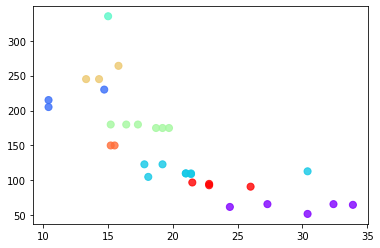

In [155]:

import statsmodels.api as sm
import numpy as np
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df_cars = pd.DataFrame(mtcars)
df_cars.head()

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

# define dataset
X = df_cars[['mpg','hp']]


# define the model
model = KMeans(n_clusters=8)
# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

X['kmeans']=yhat

pyplot.scatter(X['mpg'], X['hp'], c=X['kmeans'], cmap='rainbow', s=50, alpha=0.8)


In [156]:

df_cars.columns

Y = df_cars['hp']

X = df_cars[['mpg', 'cyl', 'disp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',  'carb']]

# train and build a linear regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))


Linear Regression R squared": 0.7164


In [157]:

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)
y_pred


array([182.26, 201.44, 127.12, 104.08, 224.98, 217.08, 209.55, 100.43,
        99.93, 209.31])

In [158]:

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)


Random Forest R squared": 0.7927
Random Forest RMSE: 26.2363


In [159]:

#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_cars)
label


df_cars['kmeans'] = label
df_cars


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kmeans
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,9
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,8
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,9
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,4


In [162]:

# plot X & Y coordinates and color by cluster number
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df_cars, x="hp", y="mpg", color="kmeans", size='mpg', hover_data=['kmeans'])
fig.show()


In [ ]:

# plot X & Y coordinates and color by cluster number
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df_cars, x="hp", y="mpg", color="mini_kmeans", size='mpg', hover_data=['mini_kmeans'])
fig.show()


In [164]:

from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['affinity'] = label
df_cars


C:\Users\ryans\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning:

'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kmeans,affinity
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4,1
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4,1
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,9,2
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,8,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,9,2
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,3
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,1
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,1
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,4,1


In [165]:

# plot X & Y coordinates and color by cluster number
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df_cars, x="hp", y="mpg", color="affinity", size='mpg', hover_data=['affinity'])
fig.show()


In [167]:

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['agglomerative'] = label
df_cars


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kmeans,affinity,agglomerative
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4,1,1
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4,1,1
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,1,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,9,2,2
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,8,2,0
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,9,2,2
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,3,3
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,1,1
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,1,1
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,4,1,1


In [168]:

# plot X & Y coordinates and color by cluster number
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df_cars, x="hp", y="mpg", color="agglomerative", size='mpg', hover_data=['agglomerative'])
fig.show()


In [170]:

from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=5)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['birch'] = label
df_cars


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kmeans,affinity,agglomerative,birch
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4,1,1,1
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4,1,1,1
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,1,1,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,9,2,2,2
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,8,2,0,0
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,9,2,2,2
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,3,3,3
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,1,1,1
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,1,1,1
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,4,1,1,1


In [171]:

# plot X & Y coordinates and color by cluster number
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df_cars, x="hp", y="mpg", color="birch", size='mpg', hover_data=['birch'])
fig.show()


In [173]:

from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.30, min_samples=9)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['dbscan'] = label
df_cars


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kmeans,affinity,agglomerative,birch,dbscan
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4,1,1,1,-1
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4,1,1,1,-1
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,1,1,1,-1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,9,2,2,2,-1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,8,2,0,0,-1
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,9,2,2,2,-1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,3,3,3,-1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,1,1,1,-1
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,1,1,1,-1
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,4,1,1,1,-1


In [174]:

# plot X & Y coordinates and color by cluster number
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df_cars, x="hp", y="mpg", color="dbscan", size='mpg', hover_data=['dbscan'])
fig.show()


In [180]:

from sklearn.cluster import MeanShift
model = MeanShift()

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['meanshift'] = label
df_cars


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kmeans,affinity,agglomerative,birch,dbscan,meanshift
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4,1,1,1,-1,0
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4,1,1,1,-1,0
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,1,1,1,-1,0
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,9,2,2,2,-1,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,8,2,0,0,-1,1
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,9,2,2,2,-1,0
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,3,3,3,-1,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,1,1,1,-1,0
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,1,1,1,-1,0
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,4,1,1,1,-1,0


In [181]:

# plot X & Y coordinates and color by cluster number
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df_cars, x="hp", y="mpg", color="meanshift", size='mpg', hover_data=['meanshift'])
fig.show()


In [182]:

from sklearn.cluster import OPTICS
model = OPTICS(eps=0.8, min_samples=10)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['optics'] = label
df_cars


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kmeans,affinity,agglomerative,birch,dbscan,meanshift,optics
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4,1,1,1,-1,0,0
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4,1,1,1,-1,0,0
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,1,1,1,-1,0,0
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,9,2,2,2,-1,1,0
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,8,2,0,0,-1,1,-1
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,9,2,2,2,-1,0,0
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,3,3,3,-1,1,-1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,1,1,1,-1,0,0
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,1,1,1,-1,0,0
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,4,1,1,1,-1,0,0


In [183]:

# plot X & Y coordinates and color by cluster number
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df_cars, x="hp", y="mpg", color="optics", size='mpg', hover_data=['optics'])
fig.show()


In [184]:

from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['spectral'] = label
df_cars


C:\Users\ryans\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kmeans,affinity,agglomerative,birch,dbscan,meanshift,optics,spectral
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4,1,1,1,-1,0,0,0
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4,1,1,1,-1,0,0,0
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,1,1,1,-1,0,0,0
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,9,2,2,2,-1,1,0,0
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,8,2,0,0,-1,1,-1,0
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,9,2,2,2,-1,0,0,0
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,3,3,3,-1,1,-1,0
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,1,1,1,-1,0,0,0
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,1,1,1,-1,0,0,0
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,4,1,1,1,-1,0,0,0


In [185]:

# plot X & Y coordinates and color by cluster number
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df_cars, x="hp", y="mpg", color="spectral", size='mpg', hover_data=['spectral'])
fig.show()


In [186]:

from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=4)

#predict the labels of clusters.
label = model.fit_predict(df_cars)
label

df_cars['gmm'] = label
df_cars


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kmeans,affinity,agglomerative,birch,dbscan,meanshift,optics,spectral,gmm
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4,1,1,1,-1,0,0,0,1
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4,1,1,1,-1,0,0,0,1
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,1,1,1,-1,0,0,0,3
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,9,2,2,2,-1,1,0,0,2
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,8,2,0,0,-1,1,-1,0,0
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,9,2,2,2,-1,0,0,0,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,3,3,3,-1,1,-1,0,0
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,1,1,1,-1,0,0,0,1
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,1,1,1,-1,0,0,0,1
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,4,1,1,1,-1,0,0,0,1


In [187]:

# plot X & Y coordinates and color by cluster number
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df_cars, x="hp", y="mpg", color="gmm", size='mpg', hover_data=['gmm'])
fig.show()

